In [1]:
import sys #https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd
print("pandas version: {}". format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}". format(np.__version__))
import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print("sklearn version: {}". format(sklearn.__version__))

import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.16.5
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3
seaborn version: 0.9.0
sklearn version: 0.21.3
-------------------------


訓練用データの中身を見る

In [2]:
df = pd.read_csv('input/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


層化抽出法を用いる。
訓練用データからさらに学習用と検証用に均等に分けたいので、価格と相関すると一般に考えられる建築年を基準にいくつかの層に分ける。

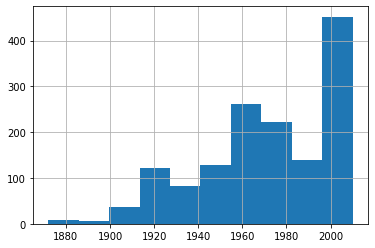

In [5]:
df['YearBuilt'].hist()

In [6]:
df['YearBuilt'].sort_values()

1349    1872
1137    1875
747     1880
304     1880
1132    1880
        ... 
898     2009
515     2009
157     2009
762     2009
378     2010
Name: YearBuilt, Length: 1460, dtype: int64

In [7]:
df["YearBuilt_cat"] = pd.cut(df["YearBuilt"],
                               bins=[1870, 1920, 1940, 1960, 1980, 2000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

In [8]:
df["YearBuilt_cat"].value_counts()

6    364
4    356
3    245
5    238
2    139
1    118
Name: YearBuilt_cat, dtype: int64

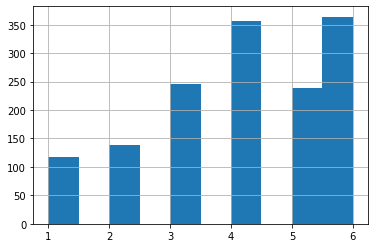

In [9]:
df["YearBuilt_cat"].hist()

In [10]:
# 欠損値がないか確認
df["YearBuilt_cat"].isnull().sum()

0

In [11]:
# 分割
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["YearBuilt_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [12]:
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [13]:
strat_test_set["YearBuilt_cat"].value_counts() / len(strat_test_set)

6    0.250000
4    0.243151
3    0.167808
5    0.160959
2    0.095890
1    0.082192
Name: YearBuilt_cat, dtype: float64

In [14]:
df["YearBuilt_cat"].value_counts() / len(df)

6    0.249315
4    0.243836
3    0.167808
5    0.163014
2    0.095205
1    0.080822
Name: YearBuilt_cat, dtype: float64

In [15]:
df = strat_train_set.copy()

In [16]:
# 相関係数を求める。
corr_matrix = df.corr()

In [17]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789441
GrLivArea        0.721527
GarageCars       0.645727
GarageArea       0.615169
TotalBsmtSF      0.610325
1stFlrSF         0.607782
FullBath         0.574343
TotRmsAbvGrd     0.548824
YearBuilt        0.528286
YearRemodAdd     0.511229
GarageYrBlt      0.483776
Fireplaces       0.479885
MasVnrArea       0.479025
BsmtFinSF1       0.370527
LotFrontage      0.353862
2ndFlrSF         0.333737
WoodDeckSF       0.332537
OpenPorchSF      0.322645
HalfBath         0.298314
LotArea          0.262480
BsmtUnfSF        0.236056
BsmtFullBath     0.215113
BedroomAbvGr     0.191396
PoolArea         0.098305
ScreenPorch      0.092189
3SsnPorch        0.042141
MoSold           0.040300
BsmtFinSF2      -0.022957
LowQualFinSF    -0.023397
BsmtHalfBath    -0.024291
MiscVal         -0.029444
Id              -0.029628
YrSold          -0.053920
OverallCond     -0.075303
MSSubClass      -0.089843
KitchenAbvGr    -0.135734
EnclosedPorch   -0.137101
Name: SalePr

In [18]:
corr_index = corr_matrix["SalePrice"].sort_values(ascending=False).index

In [19]:
index_n = corr_index[0:10].values.tolist()
index_n

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002358427C348>,
      dtype=object)

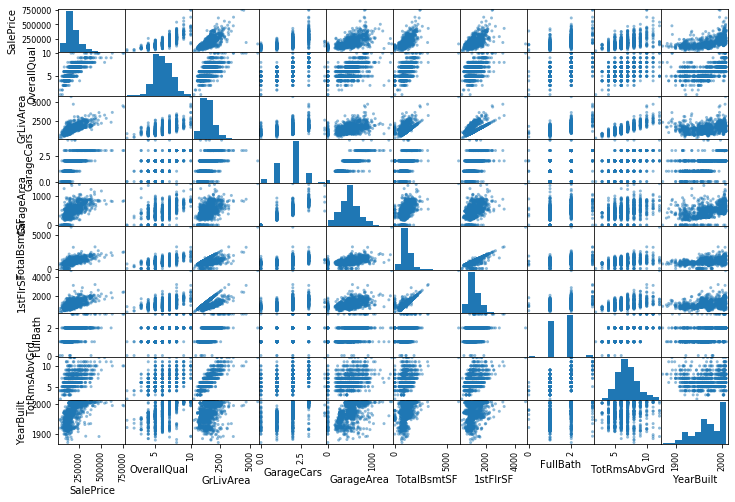

In [20]:
# 散布図を確認。
# 築年数のみ二次曲線にも見える。
from pandas.plotting import scatter_matrix

# attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars",
#               "YearBuilt"]
scatter_matrix(df[index_n], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [21]:
# sns.scatterplot(x="OverallQual", y="SalePrice",
#                       hue="GarageCars", size="GarageCars", sizes=(10, 100), data=df, alpha=0.2)

In [22]:
# sns.scatterplot(x="OverallQual", y="SalePrice",
#                       hue="MSZoning", data=df, alpha=0.5)

In [23]:
df[index_n[1:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 557 to 688
Data columns (total 9 columns):
OverallQual     1168 non-null int64
GrLivArea       1168 non-null int64
GarageCars      1168 non-null int64
GarageArea      1168 non-null int64
TotalBsmtSF     1168 non-null int64
1stFlrSF        1168 non-null int64
FullBath        1168 non-null int64
TotRmsAbvGrd    1168 non-null int64
YearBuilt       1168 non-null int64
dtypes: int64(9)
memory usage: 91.2 KB


[1870, 2020, 0, 600000]

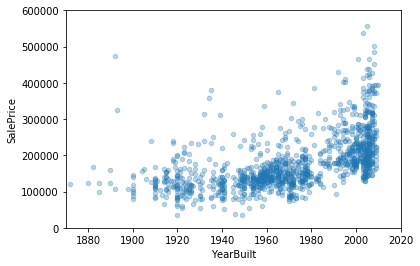

In [24]:
df.plot(kind="scatter", x="YearBuilt", y="SalePrice",
             alpha=0.3)
plt.axis([1870, 2020, 0, 600000])
# save_fig("income_vs_house_value_scatterplot")

In [25]:
df = strat_train_set.drop("SalePrice", axis=1) # drop labels for training set
df_labels = strat_train_set["SalePrice"].copy()

In [26]:
df_num = df[index_n[1:]]

In [27]:
# 量的変数の欠損値を中央値で補う。今回は欠損値はないが、今後新しいデータが入ることを想定した。
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [28]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
imputer.statistics_

array([   6. , 1467. ,    2. ,  480. ,  991.5, 1080. ,    2. ,    6. ,
       1972. ])

In [30]:
df_num.median().values

array([   6. , 1467. ,    2. ,  480. ,  991.5, 1080. ,    2. ,    6. ,
       1972. ])

In [31]:
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df.index)

In [32]:
df_tr.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
557,4.0,1336.0,1.0,570.0,637.0,897.0,1.0,7.0,1920.0
856,6.0,1026.0,2.0,576.0,940.0,1026.0,1.0,5.0,1978.0
167,8.0,2161.0,3.0,789.0,1582.0,1610.0,1.0,8.0,2007.0
727,7.0,1232.0,2.0,632.0,1232.0,1232.0,2.0,6.0,2007.0
933,7.0,1500.0,2.0,570.0,1500.0,1500.0,2.0,6.0,2004.0


In [33]:
# カテゴリ変数について
df_cat = strat_train_set.drop(corr_index[1:].values.tolist(), axis=1)
df_cat = df_cat.drop('YearBuilt_cat', axis=1)
df_cat.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
557,C (all),Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,COD,Normal,108000
856,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,CollgCr,Norm,...,Unf,TA,Fa,Y,NaN,MnPrv,NaN,WD,Normal,147000
167,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial,325624
727,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,194500
933,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,190000
255,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,230000
174,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,184000
1357,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,149900
21,RM,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,...,Unf,TA,TA,N,NaN,GdPrv,NaN,WD,Normal,139400
369,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,162000


In [34]:
corr_index[1:].values.tolist()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BedroomAbvGr',
 'PoolArea',
 'ScreenPorch',
 '3SsnPorch',
 'MoSold',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'KitchenAbvGr',
 'EnclosedPorch']

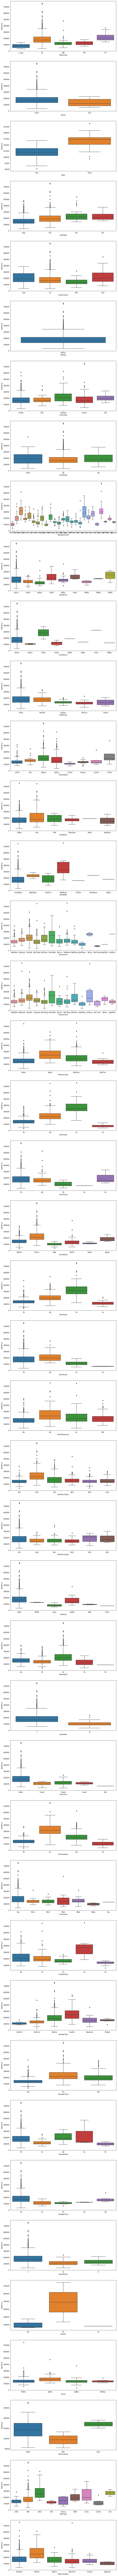

In [35]:
# カテゴリ変数の住宅価格に対する箱ひげ図。図で見てもどの変数が有用なのかが分かりにくい。

#グラフを作る
fig = plt.figure(figsize=(12,300))
for i in np.arange(43):
    ax = fig.add_subplot(43,1,i+1)
    sns.boxplot(x=df_cat.iloc[:,i], y=df_cat.SalePrice)

#グラフを整えて表示
# plt.tight_layout()
plt.show()

In [36]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 557 to 688
Data columns (total 44 columns):
MSZoning         1168 non-null object
Street           1168 non-null object
Alley            74 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non-null object
MasVnrType       1161 non-null object
ExterQual        1168 non-null object
ExterCond        1168 non-null object
Foundation       1168 non-null object
BsmtQual         1136 non-null object
BsmtCond         1136 non-null object
BsmtExposure     113

In [37]:
# カテゴリ変数の相関比を求める

import numpy as np
import pandas as pd

def corr_ratio(x, y):
    variation = ((x - x.mean()) ** 2).sum()
    inter_class = sum([((x[y == i] - x[y == i].mean()) ** 2).sum() for i in np.unique(y)])
    return 1 - (inter_class / variation)

In [38]:
ratios = pd.Series([], index=[])

In [39]:
def get_corr_ratio(col):
    set = df_cat.loc[:,[df_cat.columns[col], 'SalePrice']].dropna()
    j = set[df_cat.columns[col]]
    k = set['SalePrice']
    result = corr_ratio(k, j)
    return result

In [40]:
def set_corr_ratio(col):
    global ratios
    ratios[df_cat.columns[col]] = get_corr_ratio(col)

In [41]:
for i in range(43):
    set_corr_ratio(i)

In [42]:
ratios.sort_values(ascending=False)

Neighborhood     0.552036
ExterQual        0.477753
BsmtQual         0.457137
PoolQC           0.454360
KitchenQual      0.453043
Alley            0.411462
GarageFinish     0.267751
Foundation       0.266519
GarageType       0.207880
HeatingQC        0.192095
BsmtFinType1     0.190430
MasVnrType       0.171073
Exterior2nd      0.155680
Exterior1st      0.153142
SaleType         0.140938
SaleCondition    0.133319
BsmtExposure     0.132330
MSZoning         0.116503
FireplaceQu      0.114651
LotShape         0.085436
HouseStyle       0.084865
CentralAir       0.068306
Electrical       0.062603
MiscFeature      0.060213
PavedDrive       0.057683
RoofStyle        0.050545
Fence            0.049562
RoofMatl         0.036693
BldgType         0.034834
BsmtCond         0.033358
GarageCond       0.028883
GarageQual       0.028765
Condition1       0.028397
LotConfig        0.026211
ExterCond        0.024129
LandContour      0.023762
Functional       0.015088
Heating          0.014711
Condition2  

In [43]:
# 相関比の大きかった四つを選ぶ
index_c = ['Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual']

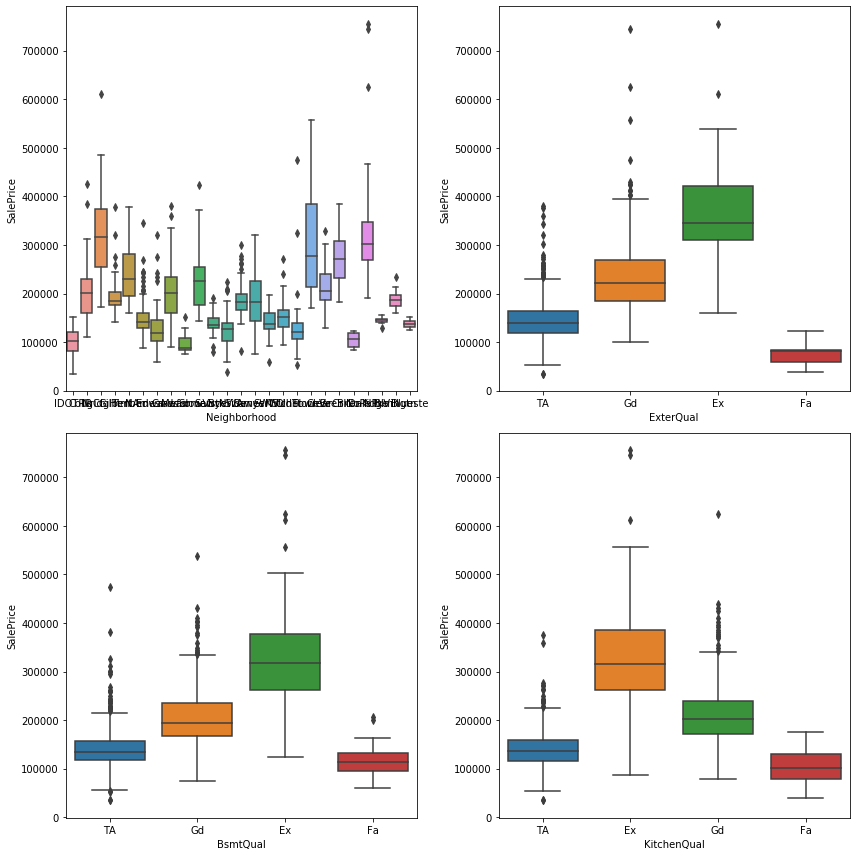

In [44]:
#グラフを作る
fig = plt.figure(figsize=(12,12))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    sns.boxplot(x=index_c[i], y='SalePrice', data=df_cat)

#グラフを整えて表示
plt.tight_layout()
plt.show()

In [45]:
# neighborは項目数が多すぎて処理できない。HogeQualは互いの相関が強すぎる。よってExterQualのみ用いる。
index_c = ['ExterQual']

In [46]:
df_cat = df_cat[index_c]
df_cat.head(10)

,ExterQual
557,TA
856,TA
167,Gd
727,Gd
933,Gd
255,Gd
174,TA
1357,TA
21,TA
369,TA


In [47]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 557 to 688
Data columns (total 1 columns):
ExterQual    1168 non-null object
dtypes: object(1)
memory usage: 58.2+ KB


In [48]:
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(df_cat)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [49]:
X = imputer_cat.transform(df_cat)
df_cat_tr = pd.DataFrame(X, columns=df_cat.columns,
                          index=df_cat.index)

In [50]:
df_cat_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 557 to 688
Data columns (total 1 columns):
ExterQual    1168 non-null object
dtypes: object(1)
memory usage: 58.2+ KB


In [51]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [52]:
# 質的変数を数値に変換(Qualは評価であり順序尺度としても見ることができる)
ordinal_encoder = OrdinalEncoder()
df_cat_tr_encoded = ordinal_encoder.fit_transform(df_cat_tr)
df_cat_tr_encoded[:10]

array([[3.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [53]:
ordinal_encoder.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)]

In [54]:
# 今回はワンホット表現を採用
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<1168x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1168 stored elements in Compressed Sparse Row format>

In [55]:
df_cat_1hot.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [56]:
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [57]:
cat_encoder.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)]

In [58]:
index_n

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [59]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_cat
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,1
856,857,80,RL,NaN,10970,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,4
167,168,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,6
727,728,20,RL,64.0,7314,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,6
933,934,20,RL,63.0,8487,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,2
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,6
146,147,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,2
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,4


In [60]:
df = strat_train_set

In [61]:
df = df[index_n + index_c]

In [62]:
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,ExterQual
557,108000,4,1336,1,570,637,897,1,7,1920,TA
856,147000,6,1026,2,576,940,1026,1,5,1978,TA
167,325624,8,2161,3,789,1582,1610,1,8,2007,Gd
727,194500,7,1232,2,632,1232,1232,2,6,2007,Gd
933,190000,7,1500,2,570,1500,1500,2,6,2004,Gd
...,...,...,...,...,...,...,...,...,...,...,...
1153,120500,6,816,1,432,816,816,1,5,1930,Gd
58,438780,10,2945,3,641,1410,1426,3,10,2006,Ex
146,105000,5,875,1,180,715,875,1,5,1931,TA
810,181000,6,1309,2,484,1040,1309,1,5,1974,TA


In [63]:
df_cat_1hot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [64]:
df_tr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
557,4.0,1336.0,1.0,570.0,637.0,897.0,1.0,7.0,1920.0
856,6.0,1026.0,2.0,576.0,940.0,1026.0,1.0,5.0,1978.0
167,8.0,2161.0,3.0,789.0,1582.0,1610.0,1.0,8.0,2007.0
727,7.0,1232.0,2.0,632.0,1232.0,1232.0,2.0,6.0,2007.0
933,7.0,1500.0,2.0,570.0,1500.0,1500.0,2.0,6.0,2004.0
...,...,...,...,...,...,...,...,...,...
1153,6.0,816.0,1.0,432.0,816.0,816.0,1.0,5.0,1930.0
58,10.0,2945.0,3.0,641.0,1410.0,1426.0,3.0,10.0,2006.0
146,5.0,875.0,1.0,180.0,715.0,875.0,1.0,5.0,1931.0
810,6.0,1309.0,2.0,484.0,1040.0,1309.0,1.0,5.0,1974.0


In [65]:
# scikit-learnではpipelineという機能があり、一連の変換を一つのセットにまとめることができる。
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [66]:
df_num_tr

array([[-1.50768739, -0.34168183, -1.03410302, ..., -1.02429605,
         0.30494024, -1.70476215],
       [-0.08005961, -0.9235223 ,  0.3079329 , ..., -1.02429605,
        -0.92111898,  0.22394968],
       [ 1.34756818,  1.20676458,  1.64996881, ..., -1.02429605,
         0.91796986,  1.1883056 ],
       ...,
       [-0.7938735 , -1.20693492, -1.03410302, ..., -1.02429605,
        -0.92111898, -1.33897197],
       [-0.08005961, -0.39235826,  0.3079329 , ..., -1.02429605,
        -0.92111898,  0.09093507],
       [ 1.34756818, -0.18589874,  0.3079329 , ...,  0.79390727,
         0.30494024,  1.1883056 ]])

In [67]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [68]:
# 実際に使ったpipeline
df = strat_train_set.drop("SalePrice", axis=1) # drop labels for training set
df_labels = strat_train_set["SalePrice"].copy()

num_attribs = list(df_num)
cat_attribs = index_c

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [69]:
df_prepared

array([[-1.50768739, -0.34168183, -1.03410302, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08005961, -0.9235223 ,  0.3079329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.34756818,  1.20676458,  1.64996881, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.7938735 , -1.20693492, -1.03410302, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08005961, -0.39235826,  0.3079329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.34756818, -0.18589874,  0.3079329 , ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
df_prepared.shape

(1168, 13)

learn

In [71]:
# モデルの選択と学習
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# ためしに５つ予測する
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 95734.83356761 153446.25034657 296456.22417829 202135.41140494
 223166.0164376 ]


In [73]:
print("Labels:", list(some_labels))

Labels: [108000, 147000, 325624, 194500, 190000]


In [74]:
# 誤差
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

38072.084984822926

In [75]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

23592.602282528747

In [76]:
# 決定木
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [77]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

508.4540066550382

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [38441.83956828 66881.15439814 34453.84995284 32514.71828633
 47231.10720601 34227.57239432 35099.02717929 39968.05356539
 49528.97068376 40988.73638669]
Mean: 41933.50296210409
Standard deviation: 9878.453726811262


In [80]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [25547.85623609 43843.27360333 65758.05945981 28142.79445848
 57534.53766287 33462.55035935 30730.2793895  29822.30434375
 32268.68450626 32536.3122621 ]
Mean: 37964.66522815445
Standard deviation: 12811.992925583756


In [81]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [82]:
housing_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

508.4540066550382

In [83]:
# 交差検証
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [22654.90490195 48882.18850862 37106.20235337 28859.99232602
 39687.98088065 29856.89423942 33190.36669338 30388.48157143
 36644.53920712 35557.26429483]
Mean: 34282.881497680384
Standard deviation: 6768.2667878596185


In [84]:
scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     37964.665228
std      13505.026337
min      25547.856236
25%      30049.298105
50%      32402.498384
75%      41248.092792
max      65758.059460
dtype: float64

In [85]:
# SVR（良く分からない）
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
housing_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

508.4540066550382

In [86]:
# グリッドサーチ。ハイパーパラメータの調整
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [87]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [88]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

42462.1066639158 {'max_features': 2, 'n_estimators': 3}
37372.23059075982 {'max_features': 2, 'n_estimators': 10}
35583.62680083793 {'max_features': 2, 'n_estimators': 30}
41961.325262662285 {'max_features': 4, 'n_estimators': 3}
35940.011022142455 {'max_features': 4, 'n_estimators': 10}
33953.454528483024 {'max_features': 4, 'n_estimators': 30}
38270.867760700974 {'max_features': 6, 'n_estimators': 3}
34853.22425674439 {'max_features': 6, 'n_estimators': 10}
33915.5656213398 {'max_features': 6, 'n_estimators': 30}
40098.94356677215 {'max_features': 8, 'n_estimators': 3}
36702.91799829745 {'max_features': 8, 'n_estimators': 10}
34753.67857454433 {'max_features': 8, 'n_estimators': 30}
38488.87284811192 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
36099.51766765297 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
39472.62667585355 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
35156.75656687876 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [90]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004388,0.000489,0.000798,3.988744e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.862889e+09,-1.468506e+09,...,-1.803031e+09,4.063425e+08,18,-3.905912e+08,-4.903604e+08,-5.053036e+08,-5.037769e+08,-4.044223e+08,-4.588909e+08,5.057846e+07
1,0.011574,0.000493,0.000997,2.780415e-07,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.838900e+09,-1.114454e+09,...,-1.396684e+09,3.537508e+08,11,-2.027802e+08,-2.555387e+08,-2.716239e+08,-2.542098e+08,-2.321986e+08,-2.432703e+08,2.381659e+07
2,0.032511,0.000797,0.001992,2.711690e-06,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.434618e+09,-1.143063e+09,...,-1.266194e+09,2.646704e+08,7,-1.718043e+08,-1.965807e+08,-1.951742e+08,-1.702609e+08,-1.675683e+08,-1.802777e+08,1.281684e+07
3,0.004783,0.000399,0.000399,4.884609e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.718270e+09,-1.501892e+09,...,-1.760753e+09,2.970963e+08,17,-2.870203e+08,-3.853830e+08,-4.629161e+08,-5.199310e+08,-5.247133e+08,-4.359927e+08,8.988435e+07
4,0.013763,0.000399,0.000998,1.991330e-06,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.421700e+09,-1.144625e+09,...,-1.291684e+09,2.435215e+08,8,-2.142641e+08,-2.520794e+08,-2.501067e+08,-2.338358e+08,-2.504481e+08,-2.401468e+08,1.454269e+07
5,0.039693,0.000399,0.001994,2.203793e-06,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.308768e+09,-1.007269e+09,...,-1.152837e+09,1.840844e+08,2,-1.734768e+08,-1.867800e+08,-1.825982e+08,-1.689736e+08,-1.740076e+08,-1.771672e+08,6.521317e+06
6,0.005387,0.000489,0.000598,4.884247e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.771415e+09,-1.160309e+09,...,-1.464659e+09,3.412035e+08,12,-2.668856e+08,-3.824620e+08,-4.543501e+08,-6.002686e+08,-4.875921e+08,-4.383117e+08,1.108349e+08
7,0.016555,0.000487,0.000997,4.795474e-06,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.506372e+09,-9.034436e+08,...,-1.214747e+09,3.018326e+08,4,-1.891273e+08,-2.330829e+08,-2.462179e+08,-2.638325e+08,-2.605278e+08,-2.385577e+08,2.703151e+07
8,0.055748,0.002918,0.002407,4.920152e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.376823e+09,-1.003117e+09,...,-1.150266e+09,1.785697e+08,1,-1.629003e+08,-1.794996e+08,-1.952384e+08,-1.734859e+08,-1.690883e+08,-1.760425e+08,1.102767e+07
9,0.006957,0.000020,0.000700,4.072207e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.355256e+09,-1.079316e+09,...,-1.607925e+09,5.217998e+08,16,-3.099268e+08,-3.954292e+08,-3.904053e+08,-5.166508e+08,-4.822388e+08,-4.189302e+08,7.321886e+07


In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [92]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

34044.12012130485 {'max_features': 7, 'n_estimators': 180}
36033.86033177936 {'max_features': 5, 'n_estimators': 15}
34225.92831568707 {'max_features': 3, 'n_estimators': 72}
35469.47169369785 {'max_features': 5, 'n_estimators': 21}
34070.801688504725 {'max_features': 7, 'n_estimators': 122}
34122.46670438555 {'max_features': 3, 'n_estimators': 75}
34009.23868643439 {'max_features': 3, 'n_estimators': 88}
34007.343343131986 {'max_features': 5, 'n_estimators': 100}
34171.9894562967 {'max_features': 3, 'n_estimators': 150}
40877.5194416467 {'max_features': 5, 'n_estimators': 2}


In [93]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.33685567, 0.15772412, 0.08544879, 0.03679694, 0.07389107,
       0.07408435, 0.0404479 , 0.02343493, 0.08523286, 0.00662907,
       0.00162975, 0.00740283, 0.07042172])

In [94]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs = list(full_pipeline.transformers_[1][1].steps[1][1].categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3368556721187702, 'OverallQual'),
 (0.15772411607690479, 'GrLivArea'),
 (0.08544878752552067, 'GarageCars'),
 (0.08523285773235482, 'YearBuilt'),
 (0.07408434767383565, '1stFlrSF'),
 (0.07389107126076946, 'TotalBsmtSF'),
 (0.0704217168318947, 'TA'),
 (0.04044790086422357, 'FullBath'),
 (0.03679693856741574, 'GarageArea'),
 (0.023434934082471454, 'TotRmsAbvGrd'),
 (0.007402828463328152, 'Gd'),
 (0.006629074336237746, 'Ex'),
 (0.001629754466273073, 'Fa')]

In [95]:
# 訓練用データ内での最終的な予測
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [96]:
final_rmse

26373.357436478065

In [97]:
final_predictions

array([ 82668.33333333, 122250.        , 102353.33333333, 135391.16666667,
       163585.        , 136575.        ,  97133.33333333, 146250.26666667,
       175820.        , 142393.33333333, 144540.        , 316080.        ,
        95328.33333333, 248146.46666667, 186617.71666667, 179496.66666667,
       134715.        , 290644.66666667, 109050.13333333, 194279.33333333,
       137133.33333333, 126210.        , 126397.36666667, 217813.33333333,
        88546.66666667, 131360.        , 180670.        , 323509.43333333,
        95213.33333333, 134784.35555556, 201484.7       ,  95083.33333333,
       108258.23333333, 176037.66666667, 143883.33333333, 216460.86666667,
       164394.46666667,  96933.33333333, 254899.16666667, 191076.73333333,
       103770.        , 182418.33333333, 114855.93333333, 137734.16666667,
       120583.33333333, 171358.        ,  78050.        , 143351.66666667,
       105344.76666667, 195015.15833333, 197898.33333333, 197370.63333333,
       174237.21666667,  

In [98]:
y_test

1380     58500
1274    139000
89      123600
291     135900
429     175000
         ...  
41      170000
597     194201
1297    140000
273     139000
883     118500
Name: SalePrice, Length: 292, dtype: int64

In [99]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([21707.61739717, 30329.64411071])

In [100]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(21707.61739716826, 30329.644110714908)

In [101]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(21729.09706935145, 30314.25911176402)

In [107]:
# 今回はkaggleなので、テストデータの予測も行う。
df_test = pd.read_csv("input/test.csv")
# 本来は必要ないが訓練データはYearBuiltの項目を作る。学習前に削除すべきであった。
# df_test['YearBuilt_cat'] = 0 #結果は同じ
df_test["YearBuilt_cat"] = pd.cut(df["YearBuilt"],
                               bins=[1870, 1920, 1940, 1960, 1980, 2000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

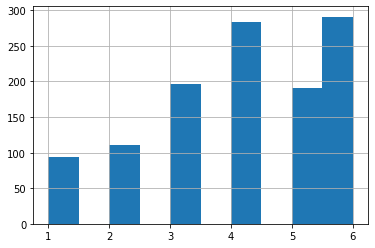

In [119]:
df_test["YearBuilt_cat"].hist()

In [114]:
# final_model = grid_search.best_estimator_

X_test = df_test

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [115]:
final_predictions.shape

(1459,)

In [116]:
submit_data =  pd.Series(final_predictions, name='SalePrice', index=df_test['Id'])

In [117]:
submit_data.to_csv('submit.csv', header=True)